<a href="https://colab.research.google.com/github/noviytrendASU/123123/blob/main/Kashirov_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем данные из файла
file_path = '/content/data.xlsx'
data = pd.read_excel(file_path)

# Просмотр первых строк данных
print("Первые строки данных:")
display(data.head())

# Получение общей информации о данных
print("\nОбщая информация о данных:")
data.info()

# Получение базовой статистики по числовым столбцам
print("\nСтатистика по числовым столбцам:")
display(data.describe())



Первые строки данных:


,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто



Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней

,Номер заказа,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты
count,116.000000,116.000000,116.000000,116,93
mean,7293.810345,579.405172,728.448276,2020-03-10 19:26:53.793103360,2020-04-02 10:50:19.354838784
min,6645.000000,0.000000,500.000000,2019-06-03 00:00:00,2020-01-04 00:00:00
25%,7182.750000,120.000000,500.000000,2020-01-25 00:00:00,2020-02-28 00:00:00
50%,7306.500000,490.000000,500.000000,2020-03-03 12:00:00,2020-03-29 00:00:00
75%,7410.750000,856.250000,1000.000000,2020-05-04 00:00:00,2020-05-05 00:00:00
max,7512.000000,2400.000000,1000.000000,2020-06-27 00:00:00,2020-06-25 00:00:00
std,155.523683,547.343577,250.149880,NaN,NaN


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [ ]:
# 1. Приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [ ]:
# 2. Преобразование данных в нужные типы
# Здесь мы проанализируем каждый столбец и решим, нужно ли изменить его тип
for column in data.columns:
    print(f"{column}: {data[column].dtype}")

номер заказа: int64
канал продаж: object
продуктовый сегмент: object
менеджер: object
название заказа: object
продавец: object
город: object
продажи факт, тыс.руб: int64
продажи план, тыс.руб: int64
дата сделки: datetime64[ns]
дата оплаты: datetime64[ns]
дней между сделкой и оплатой: object
статус: object


1. номер заказа — int64: Тип данных корректен, так как предполагается, что номер заказа является целочисленным значением.

2. канал продаж, продуктовый сегмент, менеджер, название заказа, продавец, город, статус — object: Эти столбцы содержат текстовую информацию (категории), и текущий тип данных подходит. При дальнейшем анализе можно будет преобразовать их в категориальный тип данных (category), чтобы сократить объем памяти и ускорить вычисления.

3. продажи факт, тыс.руб и продажи план, тыс.руб — int64: Для анализа продаж эти значения лучше преобразовать в float64, так как денежные значения могут быть дробными. Это также обеспечит гибкость для дальнейших расчетов.

4. дата сделки и дата оплаты — datetime64[ns]: Тип данных уже верен, что позволит легко работать с датами и производить временные расчеты.

5. дней между сделкой и оплатой — object: Этот столбец, вероятно, содержит числовое значение (разницу между датами), поэтому его следует преобразовать в int64, чтобы облегчить анализ. Если там есть пустые значения или текст, их нужно обработать перед преобразованием.


С учетом этих рекомендаций, вот обновленный код для изменения типов данных:

In [ ]:
# Преобразование данных в нужные типы
# Меняем типы данных в столбцах
if 'продажи факт, тыс.руб' in data.columns:
    data['продажи факт, тыс.руб'] = data['продажи факт, тыс.руб'].astype(float)

if 'продажи план, тыс.руб' in data.columns:
    data['продажи план, тыс.руб'] = data['продажи план, тыс.руб'].astype(float)

if 'дней между сделкой и оплатой' in data.columns:
    # Преобразуем к int, заменив возможные пропуски на -1 или другое подходящее значение
    data['дней между сделкой и оплатой'] = pd.to_numeric(data['дней между сделкой и оплатой'], errors='coerce').fillna(-1).astype(int)


1. продажи факт, тыс.руб и продажи план, тыс.руб: Преобразованы в float для гибкости при расчетах.
2. дней между сделкой и оплатой: Преобразован в int для удобства вычислений, заменив пропуски на -1 (или другое значение) для обозначения отсутствия данных.

In [ ]:
# 3. Обработка пропусков
# Анализируем количество пропусков по каждому столбцу
print("\nКоличество пропущенных значений по столбцам:")
print(data.isnull().sum())


Количество пропущенных значений по столбцам:
номер заказа                     0
канал продаж                     0
продуктовый сегмент              0
менеджер                         0
название заказа                  0
продавец                         0
город                            0
продажи факт, тыс.руб            0
продажи план, тыс.руб            0
дата сделки                      0
дата оплаты                     23
дней между сделкой и оплатой     0
статус                           0
dtype: int64


Пропущенные значения в столбце дата оплаты могут означать, что оплата по этим сделкам не была произведена.
Заменим пропущенные значения на специальное значение NaT (Not a Time), оставив их как есть, поскольку отсутствие оплаты важно учитывать при анализе, особенно для расчета задержек или неоплаченных заказов.
Причины пропусков: Пропуски в столбце дата оплаты могли возникнуть, потому что некоторые сделки еще не были оплачены или данные об оплате еще не внесены.

In [ ]:
# Обработка пропусков в столбце 'дата оплаты'
# Пропуски уже обозначены как NaT (что означает отсутствие значения), оставляем их без изменений
print("Пропуски в столбце 'дата оплаты' оставлены без изменений, так как они указывают на неоплаченные сделки.")


Пропуски в столбце 'дата оплаты' оставлены без изменений, так как они указывают на неоплаченные сделки.


In [ ]:
# 4. Подсчёт суммарных фактических продаж по всем городам
# Проверяем наличие столбцов, необходимых для выполнения задания
if 'продажи факт, тыс.руб' in data.columns and 'город' in data.columns:
    # Добавляем столбец с суммарными продажами по каждому городу
    data['суммарные продажи по городу, тыс.руб'] = data.groupby('город')['продажи факт, тыс.руб'].transform('sum')
    print("Столбец 'суммарные продажи по городу, тыс.руб' добавлен с суммой фактических продаж по каждому городу.")

# Проверка данных после добавления нового столбца
display(data.head())


Столбец 'суммарные продажи по городу, тыс.руб' добавлен с суммой фактических продаж по каждому городу.


,номер заказа,канал продаж,продуктовый сегмент,менеджер,название заказа,продавец,город,"продажи факт, тыс.руб","продажи план, тыс.руб",дата сделки,дата оплаты,дней между сделкой и оплатой,статус,"суммарные продажи по городу, тыс.руб"
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300.0,500.0,2020-02-03,2020-03-25,52,Закрыто,1370.0
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450.0,500.0,2020-03-22,2020-04-05,15,Закрыто,1370.0
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0.0,500.0,2020-03-23,NaT,-1,В процессе,1370.0
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500.0,500.0,2020-03-04,2020-03-04,1,Закрыто,1370.0
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100.0,1000.0,2020-02-19,2020-05-15,87,Закрыто,7680.0


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

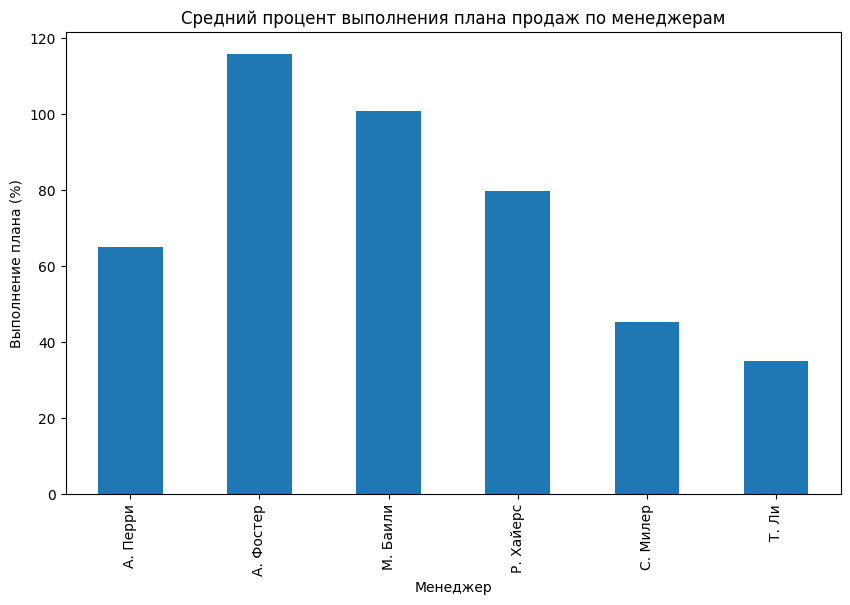

In [ ]:
import matplotlib.pyplot as plt

# Проверяем наличие столбцов, необходимых для анализа
if 'менеджер' in data.columns and 'продажи факт, тыс.руб' in data.columns and 'продажи план, тыс.руб' in data.columns:
    # Рассчитываем выполнение плана продаж по каждому менеджеру
    data['выполнение плана'] = (data['продажи факт, тыс.руб'] / data['продажи план, тыс.руб']) * 100

    # Группируем данные по менеджерам и рассчитываем среднее выполнение плана
    manager_performance = data.groupby('менеджер')['выполнение плана'].mean()

    # Строим график выполнения плана по менеджерам
    plt.figure(figsize=(10, 6))
    manager_performance.plot(kind='bar')
    plt.title("Средний процент выполнения плана продаж по менеджерам")
    plt.xlabel("Менеджер")
    plt.ylabel("Выполнение плана (%)")
    plt.show()


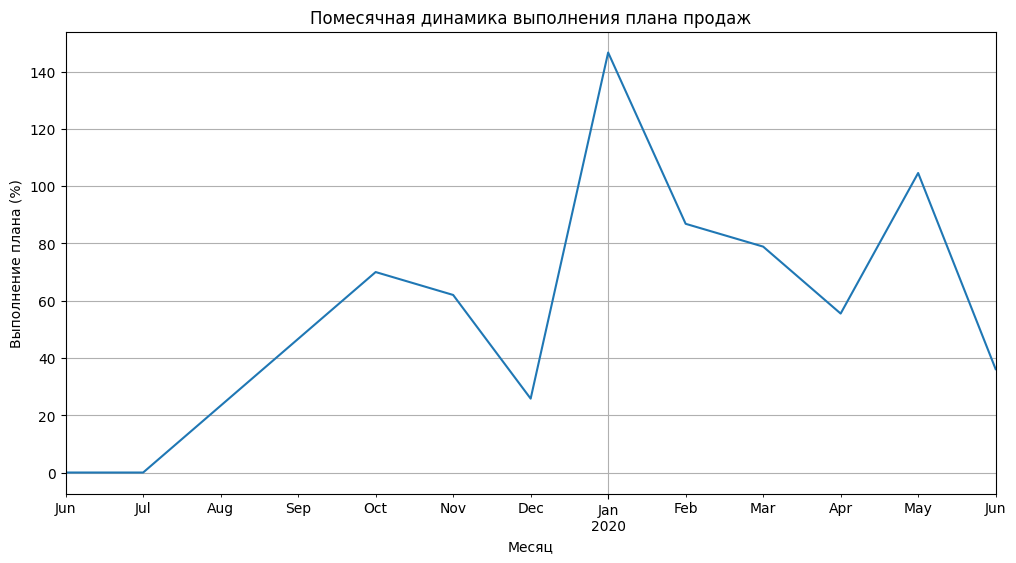

In [ ]:
# Добавляем столбец с месяцем для анализа динамики по месяцам
data['месяц'] = data['дата сделки'].dt.to_period('M')

# Рассчитываем среднее выполнение плана по месяцам
monthly_performance = data.groupby('месяц')['выполнение плана'].mean()

# Строим график помесячной динамики выполнения плана
plt.figure(figsize=(12, 6))
monthly_performance.plot()
plt.title("Помесячная динамика выполнения плана продаж")
plt.xlabel("Месяц")
plt.ylabel("Выполнение плана (%)")
plt.grid()
plt.show()


Исходя из графика видим, что сезонные "просадки" есть и они влияют на выполнение плана менеджерами. Данные за все периоды важны, так как используя их, мы можем видеть полную картину и сделать вывод, в какой период процент выполнения плана больше, а в какой меньше. График показывает, что самый высокий процент выполнения плана - в январе, а самый низкий - в период с июня по июль.

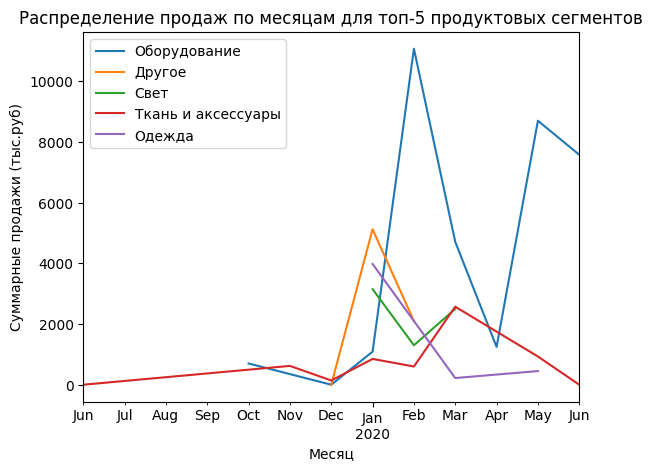

In [ ]:
# Группируем данные по продуктовым сегментам и считаем суммарные продажи
segment_sales = data.groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum()

# Выбираем сегменты с наибольшими продажами
top_segments = segment_sales.nlargest(5).index
data_top_segments = data[data['продуктовый сегмент'].isin(top_segments)]

# Строим распределение продаж по месяцам для топ-сегментов
for segment in top_segments:
    monthly_sales = data_top_segments[data_top_segments['продуктовый сегмент'] == segment].groupby('месяц')['продажи факт, тыс.руб'].sum()
    monthly_sales.plot(label=segment)

plt.title("Распределение продаж по месяцам для топ-5 продуктовых сегментов")
plt.xlabel("Месяц")
plt.ylabel("Суммарные продажи (тыс.руб)")
plt.legend()
plt.show()


In [ ]:
# Убедимся, что в данных есть нужные столбцы
if 'продуктовый сегмент' in data.columns and 'продажи факт, тыс.руб' in data.columns and 'дата сделки' in data.columns:
    # Добавляем столбец с годом сделки для разделения на периоды
    data['год'] = data['дата сделки'].dt.year

    # Разделяем данные на прошлые годы и текущий год
    # Предположим, что текущий год — это последний год в данных
    последний_год = data['год'].max()

    # Считаем суммарные продажи по сегментам для текущего года и прошлых лет
    sales_past = data[data['год'] < последний_год].groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum()
    sales_current = data[data['год'] == последний_год].groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum()

    # Находим сегменты, которые имели продажи в прошлом, но в текущем году имеют нулевые продажи
    popular_past_zero_current = sales_past[(sales_past > 0) & (sales_current == 0).reindex(sales_past.index, fill_value=True)]
    popular_past_zero_current = popular_past_zero_current[popular_past_zero_current > 0]

    # Выводим результат
    if not popular_past_zero_current.empty:
        print("Популярные в прошлом сегменты с нулевыми продажами в текущем году:")
        display(popular_past_zero_current)
    else:
        print("Нет популярных в прошлом сегментов с нулевыми продажами в текущем году.")


Нет популярных в прошлом сегментов с нулевыми продажами в текущем году.


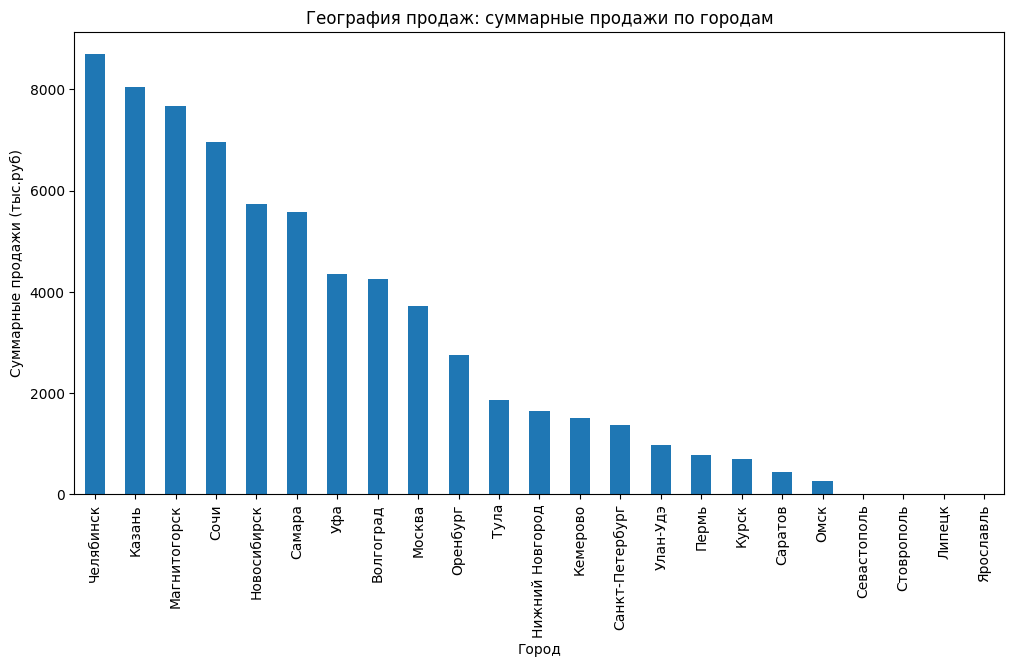

In [ ]:
# Группируем данные по городам и считаем суммарные продажи
city_sales = data.groupby('город')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)

# Строим график по суммарным продажам для каждого города
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.title("География продаж: суммарные продажи по городам")
plt.xlabel("Город")
plt.ylabel("Суммарные продажи (тыс.руб)")
plt.show()


In [ ]:
# Проверяем наличие необходимых столбцов
if 'город' in data.columns and 'продажи факт, тыс.руб' in data.columns:
    # Группируем данные по городам и считаем суммарные продажи
    region_sales = data.groupby('город')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)

    # Выводим топ-10 самых доходных регионов
    print("Топ-10 самых доходных регионов:")
    display(region_sales.head(10))



Топ-10 самых доходных регионов:


,"продажи факт, тыс.руб"
город,
Челябинск,8700.0
Казань,8040.0
Магнитогорск,7680.0
Сочи,6950.0
Новосибирск,5725.0
Самара,5574.0
Уфа,4350.0
Волгоград,4250.0
Москва,3717.0


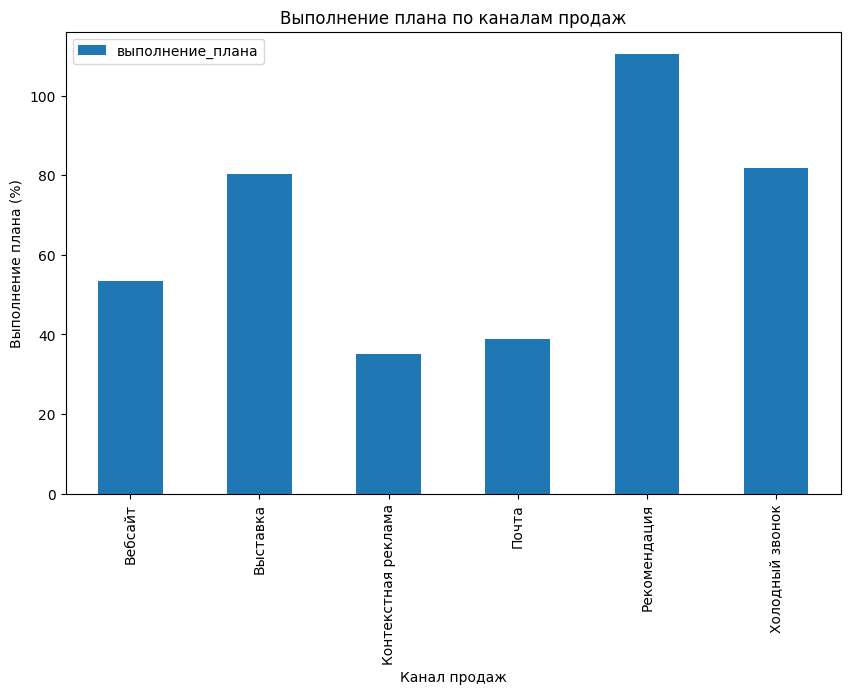

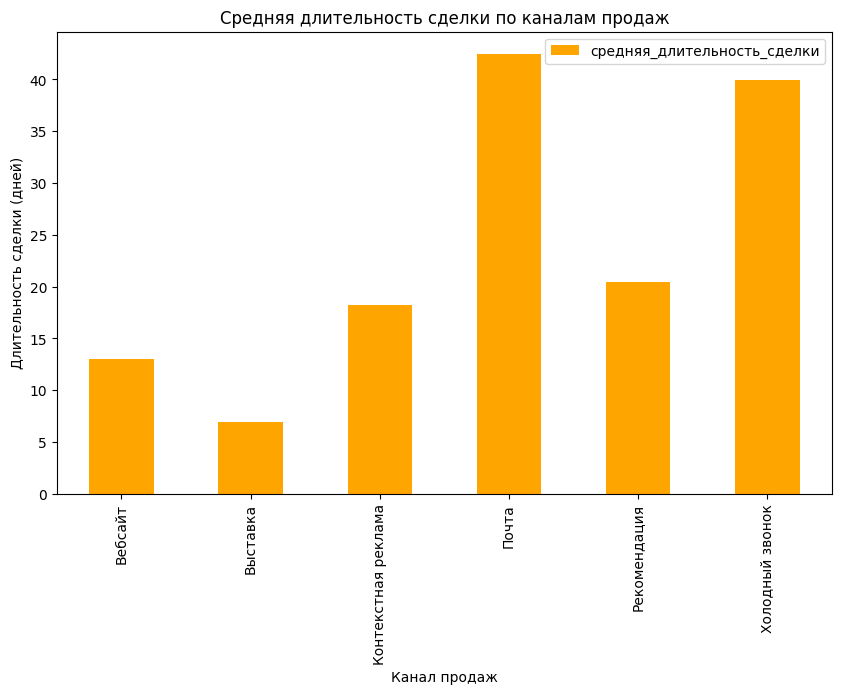

In [ ]:
# Рассчитываем среднее выполнение плана и среднюю длительность сделки по каждому каналу продаж
if 'канал продаж' in data.columns and 'дней между сделкой и оплатой' in data.columns:
    channel_performance = data.groupby('канал продаж').agg(
        выполнение_плана=('выполнение плана', 'mean'),
        средняя_длительность_сделки=('дней между сделкой и оплатой', 'mean')
    )

    # Строим графики выполнения плана и средней длительности сделки по каналам продаж
    channel_performance[['выполнение_плана']].plot(kind='bar', figsize=(10, 6))
    plt.title("Выполнение плана по каналам продаж")
    plt.xlabel("Канал продаж")
    plt.ylabel("Выполнение плана (%)")
    plt.show()

    channel_performance[['средняя_длительность_сделки']].plot(kind='bar', figsize=(10, 6), color='orange')
    plt.title("Средняя длительность сделки по каналам продаж")
    plt.xlabel("Канал продаж")
    plt.ylabel("Длительность сделки (дней)")
    plt.show()


In [ ]:
# Проверяем наличие необходимых столбцов
if 'канал продаж' in data.columns and 'выполнение плана' in data.columns and 'дней между сделкой и оплатой' in data.columns and 'статус' in data.columns:

    # 1. Среднее выполнение плана по каждому каналу продаж
    avg_plan_completion = data.groupby('канал продаж')['выполнение плана'].mean()

    # 2. Конверсия: доля завершенных сделок по каждому каналу
    # Предположим, что успешные сделки имеют статус "Завершено"
    conversion_rate = data[data['статус'] == 'Закрыто'].groupby('канал продаж').size() / data.groupby('канал продаж').size() * 100

    # 3. Средняя длительность сделки по каждому каналу
    avg_deal_duration = data.groupby('канал продаж')['дней между сделкой и оплатой'].mean()

    # Объединяем результаты в одну таблицу для удобства
    channel_analysis = pd.DataFrame({
        'Среднее выполнение плана (%)': avg_plan_completion,
        'Конверсия (%)': conversion_rate,
        'Средняя длительность сделки (дней)': avg_deal_duration
    })

    # Отображаем результаты
    print("Влияние канала продаж на выполнение плана, конверсию и длительность сделки:")
    display(channel_analysis)




Влияние канала продаж на выполнение плана, конверсию и длительность сделки:


,Среднее выполнение плана (%),Конверсия (%),Средняя длительность сделки (дней)
канал продаж,,,
Вебсайт,53.333333,66.666667,13.000000
Выставка,80.177778,77.777778,6.944444
Контекстная реклама,35.000000,62.500000,18.250000
Почта,38.750000,75.000000,42.500000
Рекомендация,110.531250,78.125000,20.437500
Холодный звонок,81.845455,90.909091,39.939394


Спрос на товарные категории (по числу заказов и суммарным продажам):


,количество_заказов,суммарные_продажи
продуктовый сегмент,,
Оборудование,46,35099.0
Другое,10,7225.0
Свет,12,6950.0
Ткань и аксессуары,21,5712.0
Одежда,6,4650.0
Электронные устройства,7,2130.0
Бассейн,1,1500.0
Сувениры,2,970.0
Спорт товары,2,750.0


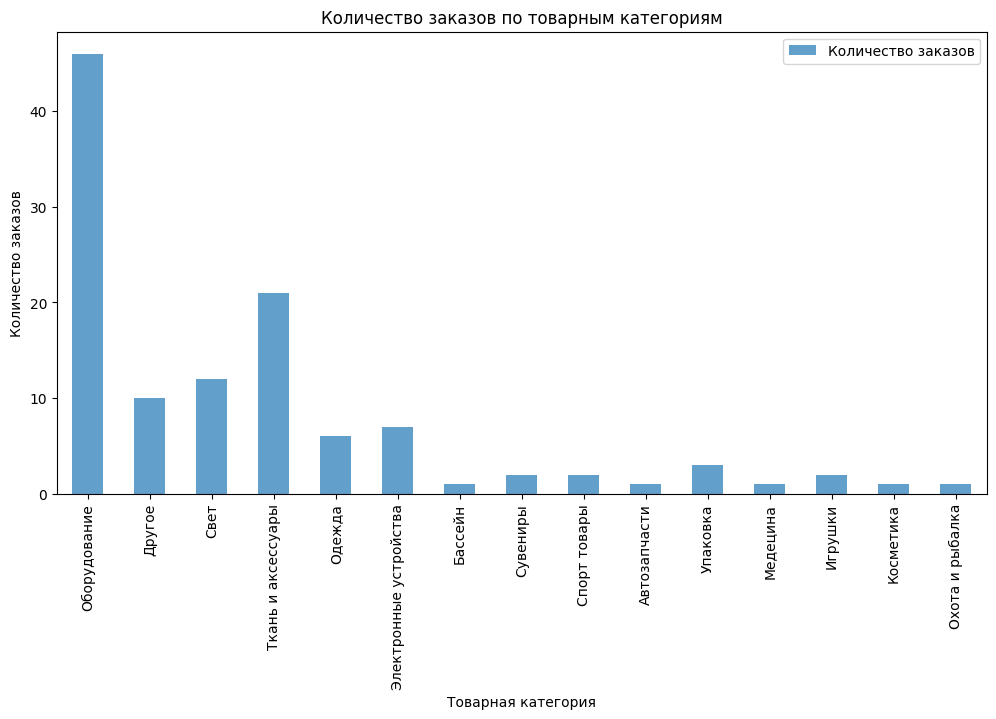

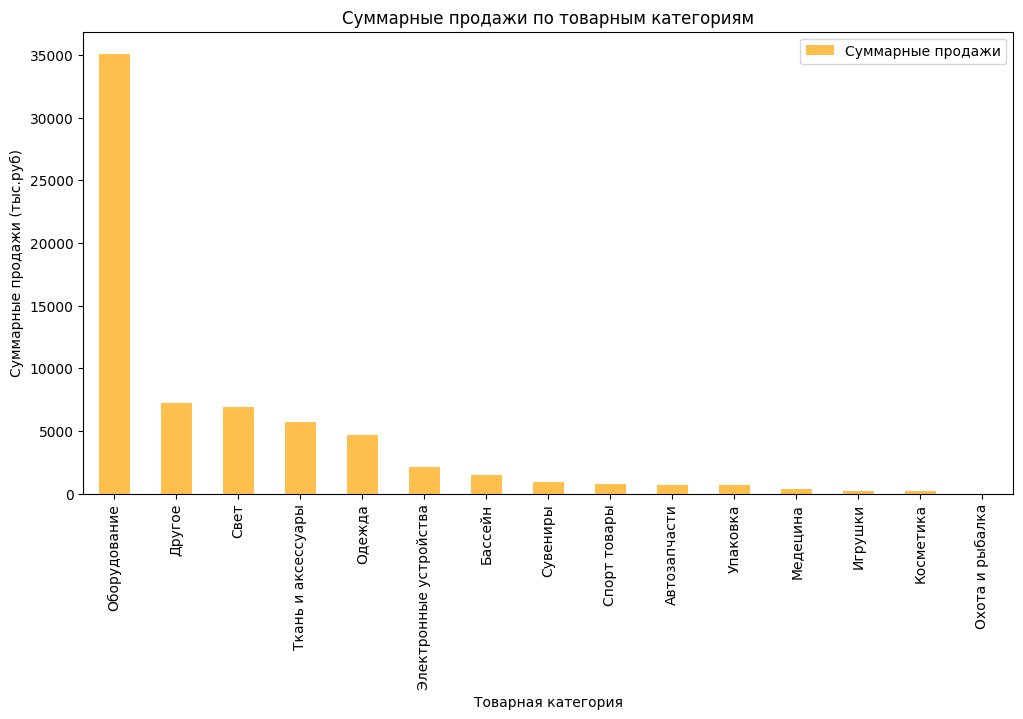

In [ ]:
# Проверяем наличие необходимых столбцов
if 'продуктовый сегмент' in data.columns and 'номер заказа' in data.columns and 'продажи факт, тыс.руб' in data.columns:
    # Считаем число уникальных заказов по каждой категории как индикатор числа клиентов
    category_demand = data.groupby('продуктовый сегмент').agg(
        количество_заказов=('номер заказа', 'nunique'),  # количество уникальных заказов как индикатор спроса
        суммарные_продажи=('продажи факт, тыс.руб', 'sum')  # суммарные продажи по категории
    )

    # Сортируем по суммарным продажам для удобства анализа
    category_demand = category_demand.sort_values(by='суммарные_продажи', ascending=False)

    # Выводим результаты
    print("Спрос на товарные категории (по числу заказов и суммарным продажам):")
    display(category_demand)

    # Визуализация
    plt.figure(figsize=(12, 6))
    category_demand['количество_заказов'].plot(kind='bar', alpha=0.7, label='Количество заказов')
    plt.title("Количество заказов по товарным категориям")
    plt.xlabel("Товарная категория")
    plt.ylabel("Количество заказов")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    category_demand['суммарные_продажи'].plot(kind='bar', color='orange', alpha=0.7, label='Суммарные продажи')
    plt.title("Суммарные продажи по товарным категориям")
    plt.xlabel("Товарная категория")
    plt.ylabel("Суммарные продажи (тыс.руб)")
    plt.legend()
    plt.show()



# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

1. Профилирование менеджеров по товарным категориям и каналам продаж

Вывод: Профилирование менеджеров по товарным категориям и каналам продаж может быть полезным для улучшения результатов. Анализ показал, что разные каналы продаж имеют значительное различие в выполнении плана, длительности сделки и, вероятно, конверсии. Например, каналы с личными рекомендациями и холодными звонками показывают высокий процент выполнения плана, в то время как вебсайт и контекстная реклама — более низкий.

Различные товарные категории также могут привлекать разных клиентов, и некоторые менеджеры могут быть более успешны в продаже определенных категорий товаров.

Профилирование менеджеров по каналам продаж и товарным категориям, где они лучше закрывают сделки и выполняют план, может позволить распределить усилия наиболее эффективно. Назначение менеджеров на каналы и категории, где они демонстрируют высокую производительность, поможет повысить общие продажи и улучшить выполнение планов.

2. Расширение самых доходных каналов продаж и регионов с высоким спросом

Вывод: Анализ выявил, что некоторые каналы продаж и регионы обеспечивают значительно большую выручку по сравнению с другими. В частности:

Доходные каналы: Каналы с высокой конверсией и выполнением плана, такие как рекомендации и холодные звонки, могут быть приоритетными для расширения, так как они показывают высокую отдачу.
Доходные регионы: Анализ географии продаж показал, что определенные регионы приносят значительный доход, что может говорить о высоком спросе на продукцию. Это стоит учитывать для потенциального расширения.

Инвестирование в расширение самых доходных каналов продаж и активное развитие в регионах с высоким спросом может быть выгодным. Это может включать маркетинговые усилия, найм или переориентацию менеджеров на востребованные регионы и усиление присутствия в этих каналах.

Профилирование менеджеров и фокус на доходные каналы и регионы позволят более эффективно распределять ресурсы и улучшать результаты продаж.